# Importing Project Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install glove_python

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700269 sha256=4224fa2e5af6696d76a21535ee2d943c7eb50cd0b4e5bc43d8c195b9b9e321e9
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
import numpy as np

In [ ]:
import json
import glob
import pandas as pd

In [ ]:
from gensim.models import Word2Vec

In [ ]:
import pickle

# Custom Word Embedding generation

## Loading pre-trained Glove Vector Embeddings

In [ ]:
glove_t = '/content/drive/My Drive/Practicum/glove.twitter.27B.100d.txt'

In [ ]:
with open(glove_t, "rb") as lines:
  wvec = {line.split()[0].decode('utf-8'): np.array(line.split()[1:], dtype=np.float32) for line in lines}

## Loading all reviews

In [ ]:
path = r'/content/drive/My Drive/Practicum/DepTag'
files = glob.glob(path+r'/*.json')

In [ ]:
len(files)

21

In [ ]:
finInfo = []
for i in range(len(files)):
  for line in open(files[i]):
    info = json.loads(line)
  finInfo.append(info)

In [ ]:
len(finInfo)

21

In [ ]:
review = []
for i in range(len(finInfo)):
  for j in range(len(finInfo[i])):
    sents = finInfo[i][j]['sentence']
    for sent in sents:
      review.append(sent)

## Defining a word2vec model

In [ ]:
em_model = Word2Vec(review, size=100, window=5, min_count=1, workers=2)

In [ ]:
w2v = {w: vec for w, vec in zip(em_model.wv.index2word, em_model.wv.vectors)}

In [ ]:
a = list(w2v.keys())

#### Updating word2vec if embedding not present in pre-trained vectors

In [ ]:
for i in a:
    if i in wvec:
       continue
    else:
       wvec.update({ i  : w2v[i]})

In [ ]:
len(list(wvec.keys()))

1193529

In [ ]:
import scipy
from scipy import spatial

In [ ]:
type(wvec)

dict

# Storing the word embedding model

In [ ]:
pickleobj = open("/content/drive/My Drive/Practicum/embedding.pickle", "wb")
pickle.dump(wvec, pickleobj)

In [ ]:
pickleobj.close()

# Calculating Cosine Distances

In [ ]:
import pickle

In [ ]:
pickle_obj = open("/content/drive/My Drive/Practicum/embedding.pickle", "rb")
wvec = pickle.load(pickle_obj)
pickle_obj.close()

In [ ]:
def cosine_distance_between_two_words(word1, word2):
    '''
    Takes input of words and returns the cosine distance of each word.
    '''
    return (1- scipy.spatial.distance.cosine(wvec[word1], wvec[word2]))

In [ ]:
cosine_distance_between_two_words('food', 'delicious') #first word will be main word, 2nd word can be DepWord, PreviousWord, NextWord

0.7807824015617371

### Plotting a heatmap

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def cosine_distance_between_two_words(word1, word2):
    '''
    Takes input of words and returns the cosine distance of each word.
    '''
    return (1- scipy.spatial.distance.cosine(wvec[word1], wvec[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    '''
    This function calculcates  heat matrix based on the cosine distances of words from one another.
    '''
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    '''
    Returns the cosine similarity index.
    '''
    vector_1 = np.mean([wvec[word] for word in s1],axis=0)
    vector_2 = np.mean([wvec[word] for word in s2],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance that our two sentences are similar to',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    '''
    Plots the heat matrix.
    '''
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

In [ ]:
words1 = ['cabin', 'entertainment', 'food', 'inflight', 'flight', 'luggage', 'seat', 'staff']

In [ ]:
words2 = ['spacious', 'screen', 'delicious', 'service', 'bad', 'lost', 'hard', 'rude']

Word Embedding method with a cosine distance asses that our two sentences are similar to 77.46 %
None


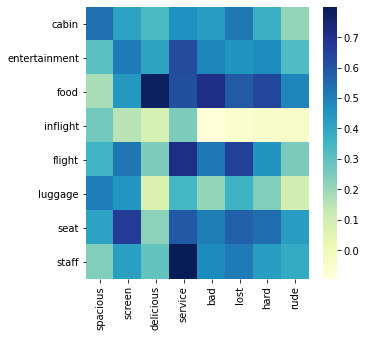

In [ ]:
heat_map_matrix_between_two_sentences(words1, words2)